In [1]:
import os
import sys
import re
import matplotlib.pyplot as plt
import peakutils as pku
from lmfit import Parameters
import ImagingReso
root_folder = os.path.dirname(os.getcwd())
sys.path.append(root_folder)
import ResoFit
from ResoFit.experiment import Experiment
from ResoFit.simulation import Simulation
from ResoFit.calibrate import Calibrate
import numpy as np
from scipy.interpolate import interp1d

x_ideal_peak:  [  7.74982045  16.77009871  19.92078626  20.56230706  21.02975644
  22.30487671  30.10164902  33.22955832  44.16766233  48.80115843
  58.38201762  80.10371275]
[ 0.00802427  0.00726914  0.00655389 ...,  0.00650823  0.00648971
  0.0064713 ]


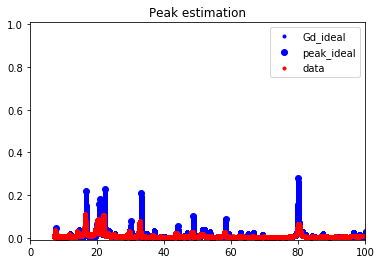

In [2]:
# Global parameters
_energy_min = 7
_energy_max = 100
_energy_step = 0.001
# Input sample name or names as str, case sensitive
_layer_1 = 'Gd'
_thickness_1 = 0.075 # mm
mass = 0.36 # gram
length = 25
width = 25
height = 0.075
mm3_to_cm3 = 0.001
density = mass/(length*width*height*mm3_to_cm3)
_density_1 = np.NaN

# Ideal
simulation = Simulation(layer_1=_layer_1,
                        thickness_1=_thickness_1,
                        density_1=np.NaN,
                        _energy_min=_energy_min,
                        _energy_max=_energy_max,
                        _energy_step=_energy_step)
simu_x = simulation.x()
simu_y = simulation.y()


ideal_y_index = pku.indexes(simu_y, thres=0.15, min_dist=10)#, thres=0.1, min_dist=50)
ideal_x_index = pku.interpolate(simu_x, simu_y, ind=ideal_y_index)
print('x_ideal_peak: ', ideal_x_index)
plt.plot(simu_x, simu_y, 'b.', label=_layer_1+'_ideal')
plt.plot(simu_x[ideal_y_index], simu_y[ideal_y_index], 'bo', label='peak_ideal')

# Experiment
experiment = Experiment(data='all_thin.txt', spectra='Image002_Spectra.txt', repeat=5)
exp_x = experiment.x()
baseline = pku.baseline(experiment.y())
exp_y = experiment.y() - baseline

# exp_y_index = pku.indexes(exp_y, thres=0.05/max(exp_y), min_dist=7)
# exp_x_index = pku.interpolate(exp_x, exp_y, ind=exp_y_index)

# print('x_exp_peak: ', exp_x_index)
# equal_size_boo = len(ideal_x_index) == len(exp_x_index)
# print('Equal size: ', equal_size_boo)

# Unifying the ideal & experimental range
exp_y_function = interp1d(x=exp_x, y=exp_y, kind='cubic')
exp_y_interp = exp_y_function(simu_x)
print(exp_y_interp)


plt.plot(simu_x, exp_y_interp, 'r.', label='data')
# plt.plot(exp_x[exp_y_index], exp_y[exp_y_index], 'go', label='peak_exp')
plt.title('Peak estimation')

plt.ylim(-0.01, 1.01)
plt.xlim(0, _energy_max)
plt.legend(loc='best')
plt.show()


#
# df = pd.DataFrame()
# df['Exp_x'] = x_data_array
# df['Exp_y'] = y_data_array
# df2 = pd.DataFrame()
# df2['Ideal_x'] = simu_x
# df2['Ideal_y'] = simu_y
# x_gap = _fit_functions.peak_x_gap(params, ideal_x_index, y_data_array)
# print('x_gap:', x_gap)

# out = minimize(_fit_functions.peak_x_gap, params, method='leastsq', args=(ideal_x_index, y_data_array))
# out = scipy.optimize.minimize(_fit_funtions.peak_x_gap_scipy, delay_us, method='leastsq', args=(ideal_x_index, y_data_array))
# print(out.__dict__)

In [3]:
a=1

In [4]:
a

1